# Сбор данных с Web-scraping и API для социально-научных исследований
---
# Домашнее задание №1: `requests` и `BeautifulSoup`

---
*Выполнил: Рожков Артём*

---
#### Правила игры
Домашние задания выполняются индивидуально. При любых нетривиальных совпадениях в решениях задач все вовлечённые домашние работы будут оценены на 0 баллов. 

- Домашние задания, присланные после дедлайна, оцениваются с использованием понижающих коэффициентов: -1 балл за каждые сутки: *так, если дедлайн домашнего задания стоит 1 марта в 23:59, а вы сдали его 3 марта в 23:00, то получите к своей оценке -2 балла. Если вы сдадите его в 02:30 4 марта, то получите к своей оценке -3 балла.*
- Домашние задания, сданные через неделю после указанного срока и позже, не принимаются и не оцениваются.
- Домашние задания, сданные в форматах, отличных от указанного, не принимаются и не оцениваются.
- Решение домашнего задания оформляется строго в этом файле, с сохранением его структуры и содержания. Домашние задания, сданные в самостоятельно сгенерированных файлах, к оцениванию не принимаются.

#### Описание 

> Это домашнее задание направлено на отработку навыков, полученных на семинарах `1-6`, а именно на работу с `requests`, `BeautifulSoup`, `pandas`. Вы продолжите работать с сайтом Высшей Школы Экономики и по написанному заранее плану соберете данные об образовательных курсах на ОП "Политология", а далее соедините получившийся у вас датасет с датасетом, который мы собрали на семинарах `5-6`.

### Задача 0. Импортируйте все необходимые для работы библиотеки <font color='2DCB67'>(max 0 баллов)</font>

In [2]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
import numpy as np

### Задача 1. Отправьте запрос к ссылке в ячейке ниже. Сохраните результат запроса в переменную. Обработайте html-разметку страницы и сохраните её в новую переменную <font color='2DCB67'>(max 0.5 баллов)</font>


https://www.hse.ru/ba/political/courses/835156111.html

In [3]:
link = 'https://www.hse.ru/ba/political/courses/835156111.html' 
html = requests.get(link)                        
soup = BeautifulSoup(html.text) 

### Задача 2. Изучите html-разметку страницы и напишите код, который выведет на экран следующую информацию: <font color='2DCB67'>(max 2 балла)</font>
<p></p>
<center> 
    <table>
        <tr>
            <th>Переменная</th>
            <th>Формат данных</th>
        </tr> 
        <tr><td>Название курса</td><td>Строка</td></tr>
        <tr><td>Число кредитов по курсу</td><td>Целое число</td></tr>
        <tr><td>Статус курса</td><td>Строка: <code>Курс обязательный</code>/<code>Курс по выбору</code></td></tr>
        <tr><td>Период реализации курса</td><td>Строка</td></tr>
        <tr><td>Имена преподавателей курса</td><td>Имена преподавателей, отсортированные в алфавитном порядке и перечисленные через запятую</td></tr>
    </table>
</center>

In [4]:
name = soup.find_all('h1')[0].text
name

'Категории политической науки'

In [5]:
credits = int(soup.find_all('div', {'class': 'b-program_big'})[-1].text)
credits

5

In [6]:
course_type = soup.find_all('dd')[-2].text
course_type

'Курс обязательный'

In [7]:
period = soup.find_all('dd')[-1].text
period

'1-й курс, 1, 2 модуль'

In [8]:
instructors = sorted([i.text for i in soup.find_all('span', {'class': 'b link'})])
instructors = ", ".join(instructors) # // тут нужно в одну строку привести или лист подойдет?
instructors

'Локшин Илья Михайлович, Мальцев Артем Михайлович, Мельвиль Андрей Юрьевич'

### Задача №3. Сбор ссылок <font color='2DCB67'>(max 0.5 баллов)</font>

Соберите ссылки на **страницы преподавателей этого курса** на сайте Вышки. Будьте внимательны и соберите только релевантные ссылки.

In [9]:
# kpn_instructors_link = [a['href'] for div in soup.find_all('div', {'class' : 'b-peoples__person smaller'}) for a in div.find_all('a')]
kpn_instructors_link = [i.a.get('href') for i in soup.find_all('div', {'class' : 'b-peoples__person smaller'})]
kpn_instructors_link 

['/org/persons/14276397', '/org/persons/101533270', '/staff/melville']

### Задача №4. Сбор 3 дополнительных атрибутов по своему выбору <font color='2DCB67'>(max 1 балл)</font>

**Обратитесь к html-разметке страницы курса и выберите, какую еще информацию вы хотели бы собрать со страницы курса. Напечатайте эти значения**.

**Что считается за атрибут:** информация, касающаяся курса; информация, на основе которой можно было бы создать осмысленную переменную, сообщающую нам что-то про курс, который нас интересует, и которая имеет хотя бы какую-то вариацию теоретически (у разных курсов разное количество кредитов, разный язык реализации, и пр.). 

**Что не считается за атрибут:** информация, которая является одинаковой для любой страницы курса (информация об академическом руководителе программе, менеджере, контакты учебного офиса, ссылки на общеуниверситетские ресурсы).

In [10]:
full_PUD_link = soup.find_all('a', {'class': 'button button_blue pud__preview-button'})[0].get('href')

#ссылка на полный ПУД курса в конструкторе (относится ли это к атрибутам?)
full_PUD_link

'https://dp.hse.ru/#/summary?implementationId=7276013930'

In [11]:
department = soup.find_all('a', {'class': 'link', 'target':'_blank'})[-1].text
department_link = soup.find_all('a', {'class': 'link', 'target':'_blank'})[-1].get('href')

# 1. Департамент, читающий курс 2. Ссылка на страницу этого департамента
department, department_link

('Департамент политики и управления', 'https://social.hse.ru/politics/')

In [12]:
element_of_control = [i.span.text for i in soup.find_all('div', {'style': 'display: flex;'})]

#Список элементов контроля курса 
element_of_control

['Игра "дебаты"', 'Экзамен', 'Минитесты', 'Семинарская активность']

### Задача №5. Напишите функцию, которая будет собирать информацию с одной страницы такого типа <font color='2DCB67'>(max 1 балл)</font>:

**Функция должна:**
* **Принимать** на вход ссылку на страницу курса;
* **Делать запрос** к странице, обрабатывать полученную html-разметку страницы с помощью функции `BeautifulSoup()`;
* **Собирать информацию о всех пяти атрибутах** из <font color='blue'>задачи 2</font>;
* **Собирать информацию о всех трех выбранных вами** атрибутах из <font color='blue'>задачи 3</font>;
* **Возвращать `pandas.DataFrame`** со всеми перечисленными выше переменными:
    * `pandas.DataFrame` должен иметь осмысленные названия колонок: не `col_1`, `col_2` и т.д.
    
    
**Создайте функцию и примените её к ссылке из <font color='blue'>задачи №1</font>**

In [22]:
def get_data_from_page_course(def_link):
    '''
    Функция get_person_data() принимает на вход ссылку на страницу курса, собирает основные данные курса и возвращает pandas.DataFrame с информацией.
    Arguments:
        > def_link - str - ссылка на страницу курса в домене hse.ru
    Returns:
        > pandas.DataFrame - с информацией о курсе:
            : course_name - название курса
            : course_credits - вес курса в зачетных единицах
            : course_status - статус курса 
            : course_period - период реализации курса
            : course_tutors - преподаватели, ведущие этот курс
            : full_PUD_link - ссылка на полный ПУД
            : course_departament - департамент, ведущий этот курс
            : course_departament_link - ссылка на департамент, ведущий этот курс
            : element_of_control - список элементов контроля
    '''
    # 1. получаем soup из введенной ссылки
    def_html = requests.get(def_link)                        
    soup = BeautifulSoup(def_html.text)

    # 2. собираем атрибуты страницы 
    name = soup.find_all('h1')[0].text # название курса
    # credits = int(soup.find_all('div', {'class': 'b-program_big'})[-1].text) # количество кредитов за курс
    try:
        credits = int(soup.find_all('div', {'class': 'b-program_big'})[-1].text)
    except:
        credits = np.nan
    course_type = soup.find_all('dd')[-2].text # статус курса 
    period = soup.find_all('dd')[-1].text # период реальзации
    instructors = sorted([i.text for i in soup.find_all('span', {'class': 'b link'})]) # преподаватели, читащие курс

    ##2.1 собираем атрибуты, отобранные во втором задании
    # full_PUD_link = soup.find_all('a', {'class': 'button button_blue pud__preview-button'})[0].get('href') -- старая версия, для задания 7
    full_PUD_link = [i.get('href') for i in soup.find_all('a', {'class': 'button button_blue pud__preview-button'})]
    department = soup.find_all('a', {'class': 'link', 'target':'_blank'})[-1].text
    department_link = soup.find_all('a', {'class': 'link', 'target':'_blank'})[-1].get('href')
    element_of_control = [i.span.text for i in soup.find_all('div', {'style': 'display: flex;'})]

    #3 создаем дата-фрейм
    course_info = pd.DataFrame([name, credits, course_type, period, instructors, full_PUD_link, department, department_link, element_of_control
         ])
    course_info = course_info.transpose() # переворачиваем дата-фрейм

    ##3.1 Присваиваем названия колонкам датафрейма
    course_info.columns = ['course_name', 'course_credits', 'course_status', 'course_period',  'course_tutors', 'full_PUD_link' , 'course_departament', 'course_departament_link', 'element_of_control']

    #4 возвращаем дата-фрейм
    return course_info

Результат исполнения функции должен выглядеть таким образом (с вашими переменными в колонках `col_one`, `col_two`, `col_three`):

In [23]:
get_data_from_page_course('https://www.hse.ru/ba/political/courses/875192498.html') # ПРИМЕР

,course_name,course_credits,course_status,course_period,course_tutors,full_PUD_link,course_departament,course_departament_link,element_of_control
0,GR-воздействие как элемент системы принятия ре...,3,Курс по выбору,"3-й курс, 4 модуль",[],[],Департамент политики и управления,https://social.hse.ru/politics/,[]


In [24]:
link = 'https://www.hse.ru/ba/political/courses/835168671.html'
html_debug = requests.get(link)                        
soup_debug = BeautifulSoup(html_debug.text) 

a = [i.get('href') for i in soup_debug.find_all('a', {'class': 'button button_blue pud__preview-button'})]
a

['https://dp.hse.ru/#/summary?implementationId=7276017146']

In [25]:
soup_debug.find_all('div', {'class': 'b-program_big'})[-1].text

'4'

### Задача №6. Соберите ссылки со страницы, сохраните их в список <font color='2DCB67'>(max 0.5 баллов)</font>

Перед вами страница с курсами ОП "Политология": https://www.hse.ru/ba/political/courses .


* **Сделайте запрос к этой странице** и обработайте её html-разметку. **Соберите ссылки на все страницы курсов, которые представлены здесь:**. 
    * **Обратите внимание:** *вам не нужно проходиться по всем страницам содержащим ссылки на курсы. Их всего 4, вам нужна только первая страница (ссылка выше).*
* **Сохраните** их в список `course_links`;
* В следующей ячейке **напечатайте названия курсов, представленные на странице**;


In [26]:
html = requests.get(' https://www.hse.ru/ba/political/courses') # делаем запрос по ссылке
soup = BeautifulSoup(html.text) # обрабатываем html

In [27]:
course_link = [i.get('href') for i in soup.find_all('a', {'class': 'link link_dark'})]
course_link

['https://www.hse.ru/ba/political/courses/875192498.html',
 'https://www.hse.ru/ba/political/courses/835140250.html',
 'https://www.hse.ru/ba/political/courses/835148844.html',
 'https://www.hse.ru/ba/political/courses/835143553.html',
 'https://www.hse.ru/ba/political/courses/835145576.html',
 'https://www.hse.ru/ba/political/courses/835129054.html',
 'https://www.hse.ru/ba/political/courses/835166759.html',
 'https://www.hse.ru/ba/political/courses/835165443.html',
 'https://www.hse.ru/ba/political/courses/873605825.html',
 'https://www.hse.ru/ba/political/courses/873593722.html',
 'https://www.hse.ru/ba/political/courses/835130978.html',
 'https://www.hse.ru/ba/political/courses/835126728.html',
 'https://www.hse.ru/ba/political/courses/835149500.html',
 'https://www.hse.ru/ba/political/courses/835137568.html',
 'https://www.hse.ru/ba/political/courses/835134848.html',
 'https://www.hse.ru/ba/political/courses/835137696.html',
 'https://www.hse.ru/ba/political/courses/835132680.html

In [28]:
course_link_name = [i.text for i in soup.find_all('a', {'class': 'link link_dark'})]
course_link_name

['GR-воздействие как элемент системы принятия решений госорганами',
 'GR-практики в системе государственного управления',
 'Анализ категориальных данных в статистических пакетах',
 'Безопасность жизнедеятельности',
 'Введение в прикладные методы сетевого анализа',
 'Введение в регрессионный анализ',
 'Введение в специальность',
 'Введение в теорию вероятностей и математическую статистику',
 'Внешнее измерение цифровых компетенций. Входной контроль',
 'Внешнее измерение цифровых компетенций. Промежуточный контроль',
 'English Language Integrative Exam',
 'Высшая математика',
 'Государственная власть в РФ',
 'Интегрированные коммуникации',
 'Ислам и политика',
 'История политических учений',
 'История России',
 'История России новейшего времени',
 'Категории политической науки',
 'Качественные методы политических исследований']

### Задача №7. С помощью цикла `for` пройдитесь по этим ссылкам, обратитесь к каждой и с помощью функции, написанной в <font color='blue'>задаче №5</font>, соберите данные о курсе. В результате исполнения кода представьте `pandas.DataFrame` с информацией об этих курсах <font color='2DCB67'>(max 1 балл)</font>.


* **7.1 Результат исполнения ячеек кода ниже – `pandas.DataFrame` с информацией о курсах**, расположенных по ссылкам в списке (созданном в рамках решения <font color='blue'>задачи №6</font> - или, если вы её не решили, из списка `first_list`);
    * Если вы не смогли собрать ссылки на предыдущем этапе, пользуйтесь списком с ссылками `first_list` ниже.
    
    
    
* **7.2 Дополните ваш код конструкцией `try-except` и реализуйте следующий механизм работы конструкции**:
    * Если обратиться к странице и собрать данные получилось, напечатайте *ссылку на страницу*;
    * Если обратиться к странице и собрать данные не получилось, напечатайте сообщение `Ошибка!` и **сохраните эту ссылку** в список `problem_links`.
    
<p></p>

* **7.3 Если вы столкнулись с <font color='orange'>ошибкой в функции</font>, вернитесь к <font color='blue'>задаче №5</font> и перепишите код так, чтобы в ходе его реализации не возникала ошибка**. 
    * Совет: Используйте функцию `get_data_from_page_course(link)` и примените её к конкретным ссылкам из списка `problem_links`, отсмотрите сообщения об ошибке и при необходимости используйте конструкцию `try-except` внутри тела функции;
    * **Если вы переписывали ваш код из задачи №5, напишите в этой ячейке: что вы исправили, где использовали функцию `try-except` и другие действия, которые вы проделывали.**
<p></p>

        <font color='blue'>..если вы переписывали вашу функцию, упомяните сделанные вами изменения тут.. </font><p></p>
<p><b> Изменения:</b>
    <i>
1. Для получения ссылки на пуд, я брал первый элемент с классом, как у кнопки, но на страницах, где нет ничего, это возвращало ошибку list out of range. Тогда я изменил переменную и записываю теперь туда ссылки через for, а поскольку ссылок не может быть больше одной, я не получу лишнуюю информацию :)
2. Следующая ошибка возникает на курсах Независимых экзаменов, в которых нет информации о кредитах, которые я беру и преобразую в int, поскольку на их месте находится язык проведения, для решения этой проблемы, я добавил try условие, где при неудаче присваиваевается NaN кредитов (что корректно, конечно, только частично) или число кредитов при успехе
</p></i>

        
<font color='FF5900'>Если вы столкнулись с ошибкой, но решили не редактировать код на предмет избавления от ошибок, за задание не будет поставлен максимальный балл.</font>

--- 
Это нормально, если информация не о всех атрибутах встречается на странице одного типа.

**Приведу пример на данных о [курсах ОП "Политология" в 2019-2020 гг.](https://www.hse.ru/ba/political/courses?page=1&year=2019):**
* На странице курса ["Количественные методы и модели оценки эффективности государства"](https://www.hse.ru/ba/political/courses/296799735.html) есть почти все возможные элементы: помимо информации в шапке курса, есть описание элементов контроля, формула оценки, содержание учебной дисциплины и пр. Однако, нет ссылки на страницу преподавателя – потому что Егор Юрескул больше не работает в Вышке;
* На странице курса ["Новые направления исследований в политической науке"](https://www.hse.ru/ba/political/courses/296809241.html) есть базовая информация в шапке и ссылка на страницу преподавателя, однако, нет больше никакой информации: ни описания курса, ни формулы оценки, ни содержания учебной дисциплины.

Сейчас и в будущем вы будете работать с неидеальными веб-страницами, которые могут имеют отличающаюся структуру. Это нормально. 

In [29]:
# Сохраненные ссылки на страницы курсов
first_list = ['https://www.hse.ru/ba/political/courses/875192498.html',
 'https://www.hse.ru/ba/political/courses/835140250.html',
 'https://www.hse.ru/ba/political/courses/835148844.html',
 'https://www.hse.ru/ba/political/courses/835143553.html',
 'https://www.hse.ru/ba/political/courses/835145576.html',
 'https://www.hse.ru/ba/political/courses/835129054.html',
 'https://www.hse.ru/ba/political/courses/835166759.html',
 'https://www.hse.ru/ba/political/courses/835165443.html',
 'https://www.hse.ru/ba/political/courses/873605825.html',
 'https://www.hse.ru/ba/political/courses/873593722.html',
 'https://www.hse.ru/ba/political/courses/835130978.html',
 'https://www.hse.ru/ba/political/courses/835126728.html',
 'https://www.hse.ru/ba/political/courses/835149500.html',
 'https://www.hse.ru/ba/political/courses/835137568.html',
 'https://www.hse.ru/ba/political/courses/835134848.html',
 'https://www.hse.ru/ba/political/courses/835137696.html',
 'https://www.hse.ru/ba/political/courses/835132680.html',
 'https://www.hse.ru/ba/political/courses/835130539.html',
 'https://www.hse.ru/ba/political/courses/835156111.html',
 'https://www.hse.ru/ba/political/courses/835168671.html']

problem_links = []

In [30]:
problem_links = []
pandas_df_with_result = pd.DataFrame()
for link in course_link:
    try:
        one_person_data = get_data_from_page_course(link)
        pandas_df_with_result = pd.concat([pandas_df_with_result, one_person_data]) 
    except Exception as e: 
        print('Ошибка!', e)
        problem_links.append(link)

In [31]:
pandas_df_with_result

,course_name,course_credits,course_status,course_period,course_tutors,full_PUD_link,course_departament,course_departament_link,element_of_control
0,GR-воздействие как элемент системы принятия ре...,3,Курс по выбору,"3-й курс, 4 модуль",[],[],Департамент политики и управления,https://social.hse.ru/politics/,[]
0,GR-практики в системе государственного управления,5,Курс по выбору,"2-й курс, 1, 2 модуль",[],[https://dp.hse.ru/#/summary?implementationId=...,Департамент политики и управления,https://social.hse.ru/politics/,"[Устные выступления, письменное решение GR-зад..."
0,Анализ категориальных данных в статистических ...,4,Курс по выбору,"3-й курс, 3, 4 модуль",[Сальникова Дарья Вячеславовна],[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Экзамен, Семинарская активность, Домашние зад..."
0,Безопасность жизнедеятельности,1,Курс обязательный,"1-й курс, 1 модуль",[Шминке Дмитрий Алексеевич],[https://dp.hse.ru/#/summary?implementationId=...,Центр поддержки студенческих инициатив НИУ ВШЭ,https://studsupport.hse.ru/,"[ДЗ№1 / Трек развития, ДЗ№2 / ЭКСТРА-альбом, Д..."
0,Введение в прикладные методы сетевого анализа,5,Курс по выбору,"4-й курс, 3 модуль",[Мальцев Артем Михайлович],[],Общеуниверситетские кафедры,/org/hse/ouk/,[]
0,Введение в регрессионный анализ,3,Курс обязательный,"2-й курс, 1 модуль","[Стукал Денис Константинович, Тамбовцева Алла ...",[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Проверочные работы, Экзамен, Домашние задания..."
0,Введение в специальность,3,Курс обязательный,"1-й курс, 1 модуль",[],[https://dp.hse.ru/#/summary?implementationId=...,Департамент политики и управления,https://social.hse.ru/politics/,"[Домашнее задание, Презентация, Контрольная ра..."
0,Введение в теорию вероятностей и математическу...,7,Курс обязательный,"1-й курс, 3, 4 модуль","[Макаров Алексей Алексеевич, Тамбовцева Алла А...",[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Контрольная работа, Домашнее задание, Тест, А..."
0,Внешнее измерение цифровых компетенций. Входно...,NaN,Курс обязательный,"2-й курс, 3 модуль",[],[],Отдел развития цифровых компетенций,https://cs.hse.ru/416696322/,[]
0,Внешнее измерение цифровых компетенций. Промеж...,NaN,Курс обязательный,"2-й курс, 4 модуль",[],[],Отдел развития цифровых компетенций,https://cs.hse.ru/416696322/,[]


In [133]:
problem_links

[]

### Задача №8. Соедините эти данные и датасет по преподавателям, который собрали в рамках семинаров `5-6` <font color='2DCB67'>(max 1 балл)</font>.

**8.1. Обратитесь к вашему датафрейму `df`.**

**8.2. Создайте датафрейм `df_full` - отфильтруйте туда только те курсы, у которых указан преподаватель**.

**8.3. Создайте в датафрейме `df_full` переменную `name`. Используйте именованную или анонимную функцию, чтобы сохранить туда только первое имя преподавателя из колонки `course_tutors`.**

In [32]:
df_full = pandas_df_with_result.loc[pandas_df_with_result['course_tutors'].apply(lambda x: len(x) > 0)]
df_full['name'] = df_full['course_tutors'].apply(lambda x: x[0])
df_full 

/var/folders/fb/nbs3gn013rqbyzrj_5n495wh0000gn/T/ipykernel_13279/2408489283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['name'] = df_full['course_tutors'].apply(lambda x: x[0])


,course_name,course_credits,course_status,course_period,course_tutors,full_PUD_link,course_departament,course_departament_link,element_of_control,name
0,Анализ категориальных данных в статистических ...,4,Курс по выбору,"3-й курс, 3, 4 модуль",[Сальникова Дарья Вячеславовна],[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Экзамен, Семинарская активность, Домашние зад...",Сальникова Дарья Вячеславовна
0,Безопасность жизнедеятельности,1,Курс обязательный,"1-й курс, 1 модуль",[Шминке Дмитрий Алексеевич],[https://dp.hse.ru/#/summary?implementationId=...,Центр поддержки студенческих инициатив НИУ ВШЭ,https://studsupport.hse.ru/,"[ДЗ№1 / Трек развития, ДЗ№2 / ЭКСТРА-альбом, Д...",Шминке Дмитрий Алексеевич
0,Введение в прикладные методы сетевого анализа,5,Курс по выбору,"4-й курс, 3 модуль",[Мальцев Артем Михайлович],[],Общеуниверситетские кафедры,/org/hse/ouk/,[],Мальцев Артем Михайлович
0,Введение в регрессионный анализ,3,Курс обязательный,"2-й курс, 1 модуль","[Стукал Денис Константинович, Тамбовцева Алла ...",[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Проверочные работы, Экзамен, Домашние задания...",Стукал Денис Константинович
0,Введение в теорию вероятностей и математическу...,7,Курс обязательный,"1-й курс, 3, 4 модуль","[Макаров Алексей Алексеевич, Тамбовцева Алла А...",[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Контрольная работа, Домашнее задание, Тест, А...",Макаров Алексей Алексеевич
0,English Language Integrative Exam,NaN,Курс обязательный,"1-й курс, 4 модуль","[Авгиненко Анна Дмитриевна, Андрюшкина Юлия Ал...",[https://dp.hse.ru/#/summary?implementationId=...,Школа иностранных языков,https://lang.hse.ru/,"[Speaking, Writing, Reading, Listening]",Авгиненко Анна Дмитриевна
0,Высшая математика,6,Курс обязательный,"1-й курс, 1, 2 модуль",[Филимонов Дмитрий Андреевич],[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Семинары, Контрольная, Экзамен]",Филимонов Дмитрий Андреевич
0,Государственная власть в РФ,5,Курс по выбору,"2-й курс, 1, 2 модуль","[Максименкова Марина Сергеевна, Нисневич Юлий ...",[https://dp.hse.ru/#/summary?implementationId=...,Департамент политики и управления,https://social.hse.ru/politics/,"[Тестирование по пройденному материалу, Письме...",Максименкова Марина Сергеевна
0,Ислам и политика,5,Курс по выбору,"4-й курс, 3 модуль","[Кулиева Нубара Салман Кызы, Лукьянов Григорий...",[https://dp.hse.ru/#/summary?implementationId=...,Базовая кафедра Института востоковедения РАН,https://we.hse.ru/ios/,"[Текущий контроль, Итоговый контроль , Группов...",Кулиева Нубара Салман Кызы
0,История политических учений,8,Курс обязательный,"1-й курс, 2-4 модуль","[Иншаков Илья Александрович, Локшин Илья Михай...",[https://dp.hse.ru/#/summary?implementationId=...,Департамент политики и управления,https://social.hse.ru/politics/,"[Семинарская активность, Тесты, Эссе, Экзамен]",Иншаков Илья Александрович


**8.4. Загрузите файл `'political_science_tutors_24.01.2024.xlsx'`** (представлен на [странице курса](https://kapustina-courses.notion.site/kapustina-courses/Web-scraping-API-2023-2024-991f447bd3e54c1897b2eed9ddc30c32) в разделе `Семинары 5-6. Парсинг HTML с BeautifulSoup. requests. pandas – продолжение (24 января 2024)`.  **Сохраните его как `df_tutors`**.

In [101]:
df_tutors = pd.read_excel('political_science_tutors_24.01.2024.xlsx')

df_tutors.drop(df_tutors.columns[0], axis=1, inplace=True) # удаляем первый столбец с значеним 0


In [103]:
df_tutors

,name,is_bachelor,is_master,is_candidat,year_start_in_hse,interests,n_of_best,languages,n_languages,n_of_publications,n_unique_courses,unique_courses,link
0,Акаева Кавсарат Исламовна,0,1,0,2019,"высшее образование, инновации в образовании, ц...",0,английский,1,1,14,"Independent Data Science Test. Advanced Level,...",https://www.hse.ru/mirror/org/persons/redir/30...
1,Акоз Кемаль Киванч,1,1,1,2018,"Прикладная микроэкономическая теория, политиче...",3,"английский, турецкий, пекарский",3,7,9,"Contemporary Economics, International Economic...",https://www.hse.ru/mirror/org/persons/redir/22...
2,Арбатли Эким,1,1,1,2012,"демократизация, ресурсный национализм, граждан...",3,"турецкий, английский, французский, русский",4,15,5,"Comparative Politics, Current Trends in Politi...",https://www.hse.ru/mirror/org/persons/redir/61...
3,Баженов Григорий Александрович,0,0,1,2024,"всеобщая экономическая история, макроэкономика...",0,английский,1,0,6,"Макроэкономика, Макроэкономика (продвинутый ур...",https://www.hse.ru/mirror/org/persons/redir/20...
4,Байссвенгер Мартин Эрвин,0,1,1,2013,"русская история, европейская история, интеллек...",7,"английский, немецкий, русский, чешский, францу...",6,36,8,"Political Projects in the XX Сentury, Politica...",https://www.hse.ru/mirror/org/persons/redir/93...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Чеснаков Алексей Александрович,0,0,1,2019,"методология политической науки, Политический а...",0,английский,1,0,4,"Политическая экспертиза, Политические исследов...",https://www.hse.ru/mirror/org/persons/redir/30...
91,Шендерович Мария Филипповна,0,0,0,2016,иностранные языки,0,английский,1,0,8,English for General Communication Purposes. In...,https://www.hse.ru/mirror/org/persons/redir/19...
92,Шипи Элиф Аладдиновна,1,1,0,2018,"политические коммуникации, медиапотребление, р...",0,"английский, турецкий, французский",3,1,5,"Introduction to Global Communication, Интегрир...",https://www.hse.ru/mirror/org/persons/redir/20...
93,Шустова Елена Дмитриевна,0,1,0,2019,"когнитивная лингвистика, критический дискурс-а...",0,"английский, немецкий",2,2,11,"English Language, English for General Academic...",https://www.hse.ru/mirror/org/persons/redir/31...


**8.5. Используйте функцию `pandas.merge` и соедините два датасета – датасет `df_full` и датасет `df_tutors`**
* Датасет слева (`left:`) – `df_full`;
* Датасет справа (`right:`) – `df_tutors`;
* Смэтчите их по имени (первого) преподавателя (см. <font color='blue'>задачу №8, пункт 3</font>).

У вас должен получиться датафрейм со следующей структурой: **одно наблюдение – информация об одном курсе с дополнительной информацией о первом преподавателе этого курса.**

*Если вы не работали ранее с функцией `pandas.merge`, используйте справку по функции (с помощью `help(..)`) или посмотрите [документацию по функции](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).*

In [34]:
fully_full_df = pd.merge(df_full, df_tutors, on='name', how='inner')
fully_full_df

,course_name,course_credits,course_status,course_period,course_tutors,full_PUD_link,course_departament,course_departament_link,element_of_control,name,...,is_candidat,year_start_in_hse,interests,n_of_best,languages,n_languages,n_of_publications,n_unique_courses,unique_courses,link
0,Анализ категориальных данных в статистических ...,4,Курс по выбору,"3-й курс, 3, 4 модуль",[Сальникова Дарья Вячеславовна],[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Экзамен, Семинарская активность, Домашние зад...",Сальникова Дарья Вячеславовна,...,0,2011,сравнительные исследования,5,английский,1,14,17,"Mathematics, Panel Data: Analysis and Applicat...",https://www.hse.ru/mirror/org/persons/redir/14...
1,Введение в прикладные методы сетевого анализа,5,Курс по выбору,"4-й курс, 3 модуль",[Мальцев Артем Михайлович],[],Общеуниверситетские кафедры,/org/hse/ouk/,[],Мальцев Артем Михайлович,...,0,2015,"стратегическая международная безопасность, меж...",1,"английский, немецкий",2,4,7,China and Russia: Great Powers in an Era of Gl...,https://www.hse.ru/mirror/org/persons/redir/10...
2,Введение в регрессионный анализ,3,Курс обязательный,"2-й курс, 1 модуль","[Стукал Денис Константинович, Тамбовцева Алла ...",[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Проверочные работы, Экзамен, Домашние задания...",Стукал Денис Константинович,...,1,2008,"социальные медиа, политическое поведение, анал...",6,"английский, испанский, немецкий",3,46,8,"Foreign Policy Analysis, Political Science, Вв...",https://www.hse.ru/mirror/org/persons/redir/24...
3,Высшая математика,6,Курс обязательный,"1-й курс, 1, 2 модуль",[Филимонов Дмитрий Андреевич],[https://dp.hse.ru/#/summary?implementationId=...,Общеуниверситетские кафедры,/org/hse/ouk/,"[Семинары, Контрольная, Экзамен]",Филимонов Дмитрий Андреевич,...,1,2013,"дифференциальные уравнения, динамические систе...",8,"английский, французский, немецкий, испанский",4,18,4,"Высшая математика, Линейная алгебра и математи...",https://www.hse.ru/mirror/org/persons/redir/63...
4,Государственная власть в РФ,5,Курс по выбору,"2-й курс, 1, 2 модуль","[Максименкова Марина Сергеевна, Нисневич Юлий ...",[https://dp.hse.ru/#/summary?implementationId=...,Департамент политики и управления,https://social.hse.ru/politics/,"[Тестирование по пройденному материалу, Письме...",Максименкова Марина Сергеевна,...,0,2010,"качественные методы, политические представлени...",1,"английский, немецкий",2,10,10,"Введение в современную политическую науку, Гос...",https://www.hse.ru/mirror/org/persons/redir/13...
5,Ислам и политика,5,Курс по выбору,"4-й курс, 3 модуль","[Кулиева Нубара Салман Кызы, Лукьянов Григорий...",[https://dp.hse.ru/#/summary?implementationId=...,Базовая кафедра Института востоковедения РАН,https://we.hse.ru/ios/,"[Текущий контроль, Итоговый контроль , Группов...",Кулиева Нубара Салман Кызы,...,0,2019,"Ближний Восток, Турция, Внешняя политика Турци...",0,"английский, арабский, азербайджанский, турецкий",4,3,1,Ислам и политика,https://www.hse.ru/mirror/org/persons/redir/54...
6,История политических учений,8,Курс обязательный,"1-й курс, 2-4 модуль","[Иншаков Илья Александрович, Локшин Илья Михай...",[https://dp.hse.ru/#/summary?implementationId=...,Департамент политики и управления,https://social.hse.ru/politics/,"[Семинарская активность, Тесты, Эссе, Экзамен]",Иншаков Илья Александрович,...,0,2014,"политическая теория, политические идеологии, с...",5,английский,1,16,8,Methodology and Research Methods of Political ...,https://www.hse.ru/mirror/org/persons/redir/10...
7,История России,4,Курс обязательный,"1-й курс, 1, 2 модуль",[Туманова Анастасия Сергеевна],[https://dp.hse.ru/#/summary?implementationId=...,Школа исторических наук,https://hist.hse.ru/,[Тест входного контроля базовых знаний и компе...,Туманова Анастасия Сергеевна,...,1,2008,история и теория гражданского общества и конст...,0,"английский, каменский",2,152,14,"Human Rights for Open Soc

### Задача №9. Проведите небольшой дескриптивный анализ ваших данных: <font color='2DCB67'>(max 1.5 балла)</font>
 
**Для каждой переменной ниже сделайте следующее:**
1. **Приведите распределение переменных** (с помощью методов и функций `pandas`), посчитайте и прокомментируйте наиболее типичные значения;
2. **Выберите подходящий тип графика и постройте график**, который может наиболее корректно отобразить распределение этих переменных:
    * Используйте пакеты `seaborn`, `matplotlib`, `plotly` или любые другие;
    * Прокомментируйте, почему вы выбрали именно такой тип графика;
    * При оценивании графиков внимание будет уделяться не только выбранному типу графика, но и оформлению: подписям шкал, названию и пр. 
3. **Проинтерпретируйте полученные значения и полученный график. Что вы можете содержательно сказать о получившихся значениях?**

**9.1. Распределение показателя наличия кандидатской/PhD (`is_candidat`) у преподавателей этих курсов**

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
fully_full_df['is_candidat'].describe()

count    11.000000
mean      0.454545
std       0.522233
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: is_candidat, dtype: float64

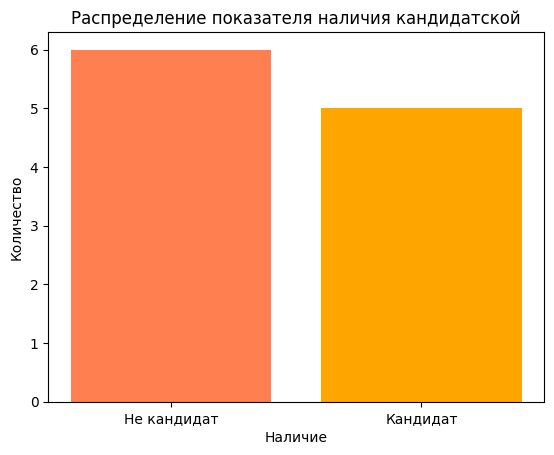

In [37]:
x = len(fully_full_df.loc[fully_full_df['is_candidat'] == 0, 'is_candidat'])
y = len(fully_full_df.loc[fully_full_df['is_candidat'] == 1, 'is_candidat'])
plt.bar([0, 1], [x, y], tick_label=['Не кандидат', 'Кандидат'], color=['coral', 'orange'])
plt.xlabel('Наличие')
plt.ylabel('Количество')
plt.title('Распределение показателя наличия кандидатской')

plt.show()

<i>Как можно увидеть, наличие кандитаской степени у преподавателей из дата-фрейма примерно одинаково (54 и 45%), хотя, конечно, некандидатов чуть-чуть больше</i>

**9.2 Распределение числа уникальных курсов (`n_unique_courses`) у преподавателей этих курсов**

In [40]:
fully_full_df['n_unique_courses'].describe()

count    11.000000
mean      8.454545
std       4.655398
min       1.000000
25%       5.500000
50%       8.000000
75%      11.000000
max      17.000000
Name: n_unique_courses, dtype: float64

In [47]:
fully_full_df.loc[fully_full_df['n_unique_courses'].idxmax(), 'name'] # Преподаватель с максимальным количеством курсов

'Сальникова Дарья Вячеславовна'

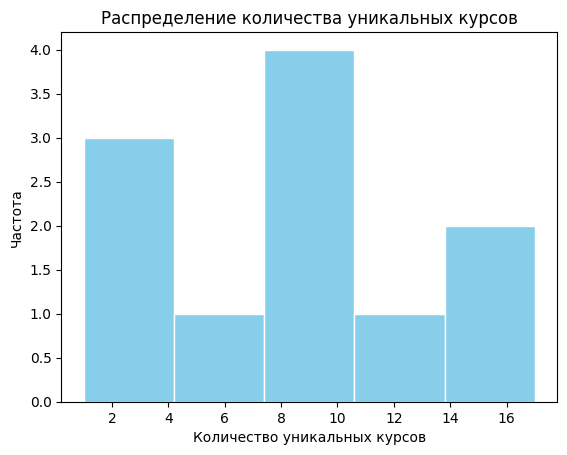

In [48]:
# Построение гистограммы
plt.hist(fully_full_df['n_unique_courses'], bins='auto', color='skyblue', edgecolor='w')

# Добавление подписей осей и названия
plt.xlabel('Количество уникальных курсов')
plt.ylabel('Частота')
plt.title('Распределение количества уникальных курсов')

# Отображение гистограммы
plt.show()

<i>Мы можем заметить, что распределение уникальных курсов многовершинное, среднее количество курсов -- 8, при этом достаточное количество преподателей ведут не более 5 или сразу больше 11. Максимально один преподаватель -- Сальникова Дарья Михайловна -- ведет сразу 17 курсов </i>

**9.3 Выберите еще одну переменную и проинтерпретируйте её распределение, наиболее типичные значения, выберите и постройте наиболее подходящий график**

In [89]:
fully_full_df['year_start_in_hse'].describe() # краткое описание распределение лет

count      11.000000
mean     2011.272727
std         4.429242
min      2002.000000
25%      2009.000000
50%      2011.000000
75%      2013.500000
max      2019.000000
Name: year_start_in_hse, dtype: float64

In [78]:
fully_full_df['year_start_in_hse'].value_counts().describe() 
# краткое описание для количества преподавателей по годам

count    8.000000
mean     1.375000
std      0.517549
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max      2.000000
Name: count, dtype: float64

In [51]:
fully_full_df['year_start_in_hse'].mode() # посмотрим на моды лет

0    2008
1    2011
2    2013
Name: year_start_in_hse, dtype: int64

In [83]:
mode_value = [i for i in fully_full_df['year_start_in_hse'].mode()] # ищем количество преподавателей для каждого значения моды
mode_count = fully_full_df['year_start_in_hse'].value_counts()[mode_value] 

mode_count 

year_start_in_hse
2008    2
2011    2
2013    2
Name: count, dtype: int64

In [93]:
fully_full_df['year_start_in_hse'].quantile(0.75) - fully_full_df['year_start_in_hse'].quantile(0.25) # межквартильный размах 

4.5

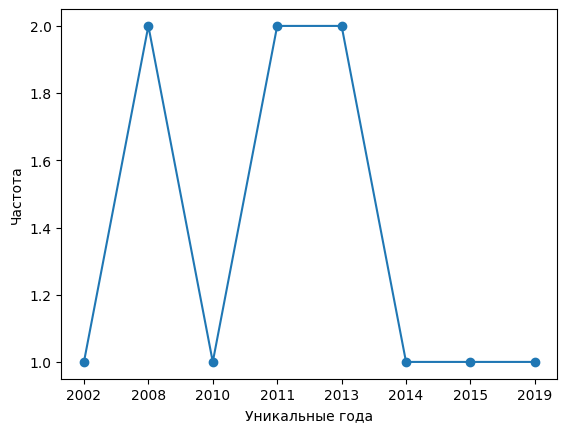

In [87]:
# График начала работы в Вышке
data_for_graf = fully_full_df['year_start_in_hse'].value_counts() # считаем значения
data_for_graf_sorted = data_for_graf.sort_index()
plt.plot(data_for_graf_sorted.index.astype(str), data_for_graf_sorted.values, marker='o') # строим линейный график

plt.xlabel('Уникальные года')
plt.ylabel('Частота')

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x28006e7a0>,
 'caps': [<matplotlib.lines.Line2D at 0x28006ece0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28006e500>],
 'medians': [<matplotlib.lines.Line2D at 0x28006f220>],
 'fliers': [<matplotlib.lines.Line2D at 0x28006f4c0>],
 'means': []}

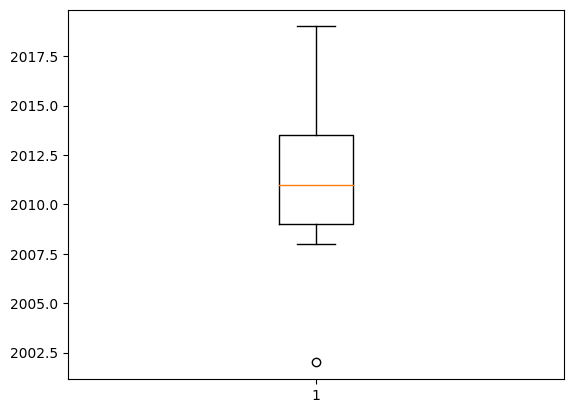

In [86]:
plt.boxplot(fully_full_df['year_start_in_hse'])

<i>График прихода преподавателей имеет крайне интересное распределение, оно неравномерно и показывает, что максимально приходило всего два преподавателя в вуз. Особо интересно, что с 2013 по 2015 каждый год приходил хотя бы один сотрудник.  Мы видим, что в среднем преподаватели приходиди к нам в начале 10-х годов (медиана на 2011), на втором графике отдельно отмечена точка выброса -- 2002 год, межквартильный размах составил -- 4.5 года </i>

### Задача №10. Подумайте о собранных вами данных <font color='2DCB67'>(max 1 балл)</font>

Порефлексируйте на тему собранных вами данных по курсам ОП "Политология". **Напишите с опорой на следующие вопросы небольшой текст про ваши данные:**

* Как вам кажется, насколько корректны собранные вами данные? Как переменные встречаются всегда, а какие нет? Страницы, с которыми вы работали в ходе домашнего задания, имеют очень схожую структуру и полноту данных или нет?
* С какими проблемами в ходе сбора данных вы столкнулись?
* Как можно было бы улучшить ваш код?
* В теории, для ответа на какой вопрос эти данные были бы полезны? С какими датасетами можно было бы совместить данные по курсам на ОП "Политология" чтобы в дальнейшем получить ответ на этот вопрос? Придумайте 1-2 идеи для исследования или аналитического материала.

<b>Ответ:</b>

Наши данные, конечно, очень неполноценны, мы собирали их только по 1 из нескольких страниц, где преподаватели сгрупированны по алфавиту, из-за чего наша выборка крайне мала. Говоря о генеральной совокупности, наши данные все равно будут содержать посторонние данные, например, технические курсы для экзаменов (НОК, Иннополис, НЭ по английскому, БЖД), где или будут более 10 преподавателей, или не будет никого, кроме того, они часто не имеет почти никаких данных, кроме названия, что безусловное нам мешает. В нашей выборке было пару таких курсов, но мы смогли их обработать. Однако, не только пободные курсы не полные, если мы посмотрим на курсы малоответсвенных СП или курсы 4 модуля, то у них также может не быть большего количества информации, кроме того, из-за сложных кадровых структур, даже хорошие по заполненности курсы, могут не иметь корректного преподавателя. С стороны сборки этих страниц, можно сказать, что они крайне стандартизированны, имеют идентичную струткуру, что безусловно сильно упрощает работу по ее парсингу не только в рамках ОП, но и всей Вышке, что крайне круто может помочь в дальнейшем.
Основная проблема -- неполные данные. Ее можно обойти дополнительной проверкой, как мы сделали с количеством кредитов, или, например, использовать другой механизм поиска тегов, через дочернее элементы или регулярные выражения. Другая проблема частично связана с первой и заключается в том, что иногда один элемент я могу искать, через тот же тег, что и какой-нибудь технический элемент, что часто очень неожиданно, а, учитывая, что это не возвращает ошибку, можно не заметить, что вместо ссылки на пуд, ты получаешь ссылку на красную кнопку на странице.
Исходя из всего этого, главное улучшение -- проработка всех возможных ошибок, которые могут возникнуть при работе с нестрандартными элементами и проверка элемента на совпадение с ожидаемыми значениями (например, проверять, что язык курса возвращет только <i>RUS, ENG или RUS+ENG,</i>, а не <i>БАКАЛАВРИАТ</i>). Далее, переписать некоторые функции в переменных, так чтобы в них не было ссылок на индексы, поскольку есть вероятнрость словить ошибку на нестандартных страницах. Следующий шаг, именно в рамках этого дз, понять и изменить соединение датафрейма, чтобы не было предупредления, поскольку сейчас, при любом указание на строку (или без него) ничего не меняется. 
Мне кажется такой датасет, мог бы помочь условному ККО СС для работы с анализом ПУДов, соотнесению их с результатом СОПов, чтобы автоматизировать кампанию по проверке или, например, составить топ департаментов. Можно собирать данные по разным кампусам, чтобы узнать различия в программах, например, с синонимичной питерской, используя данные о преподавателях, ЭК, кредитами, наполненностью, преподавателями. Или используя данные о распределение кредитов, статуса курсов, времени их чтения сравнивать варинативность разных ОП